In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import resample as rp
import intervals as ci
import observe as obs
from multiprocessing import Pool, cpu_count

In [2]:
# simulation of the entire demographic history
pop_ts = obs.sim_one_population(
    diploid_size=200,
    seq_len=1e9,
    rec_rate=1e-8,
    mut_rate=1e-8
)

obs_ts = obs.observe(ts=pop_ts, num_inds=50, max_sites=5000)

In [3]:
pop_ts_diversity = pop_ts.diversity(span_normalise = False, windows = 'sites').mean()

obs_ts_diversity = obs_ts.diversity(span_normalise = False, windows = 'sites').mean()

print('Site diversity for the simulated population is: ', pop_ts_diversity)
print('Site diversity for the observed population is: ', obs_ts_diversity)

Site diversity for the simulated population is:  0.14995947201785145
Site diversity for the observed population is:  0.15113082828282828


In [4]:
# site diversity for the observed population
diversity = rp.site_diversity(obs_ts)
diversity

array([0.        , 0.02      , 0.        , ..., 0.02      , 0.03959596,
       0.05878788])

In [5]:
bt = rp.bt_resample_sites(diversity, n_boot=500)
jk_d, jk_vals = rp.jk_delete_one(diversity, obs_ts_diversity)
jk_m_d, jk_m_vals = rp.jk_delete_m(diversity, obs_ts_diversity, n_fold=int(np.sqrt(obs_ts.num_sites)))
jk_mj_d, jk_mj_vals, sizes = rp.jk_delete_mj(diversity, obs_ts_diversity, n_fold=int(np.sqrt(obs_ts.num_sites)))

In [6]:
sizes

array([  57,   62,   14,   55,   61,   16,   28,   35,   52,   26,   41,
         55,   25,   30,   55,   32,   20,   16,   53,   19,   10,   11,
         67,   42,   35,   36,   12,   26,   67,   39,   36,   34,   60,
         10,   33,   38,   55,   57,   34,   21,   12,   15,   46,   41,
         27,   27,   28,   16,   16,   19,   17,   66,   41,   24,   35,
         55,   12,   62,   65,   13,   15,   52,   28,   48,   34,   51,
         59,   13,   62, 2526])

<AxesSubplot:ylabel='Count'>

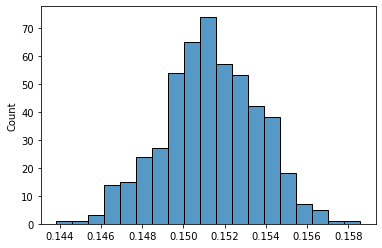

In [7]:
sns.histplot(bt)

<AxesSubplot:ylabel='Count'>

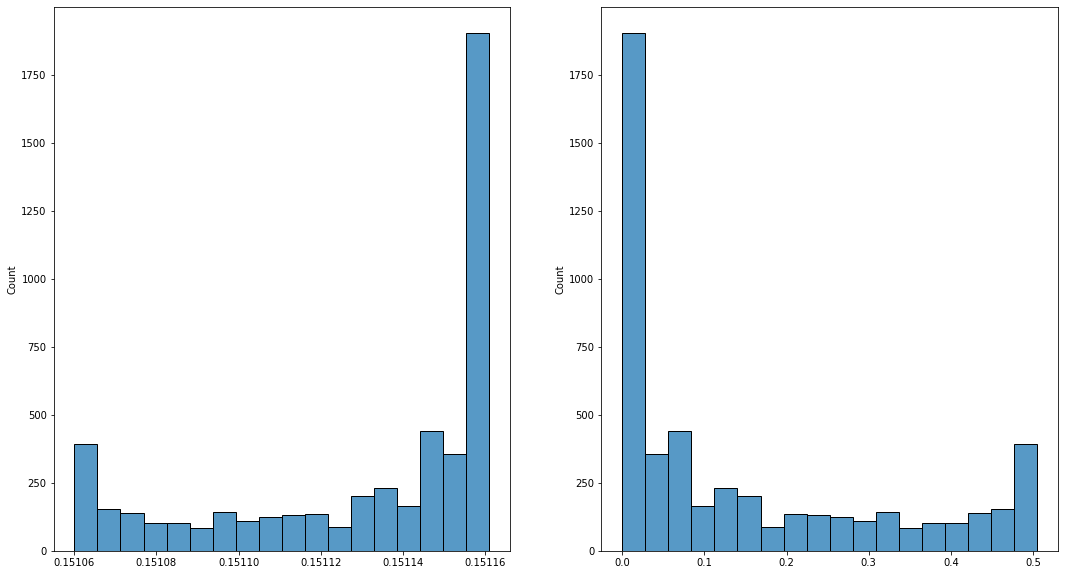

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.histplot(ax=axes[0], data=jk_d)
sns.histplot(ax=axes[1], data=jk_vals)

<AxesSubplot:ylabel='Count'>

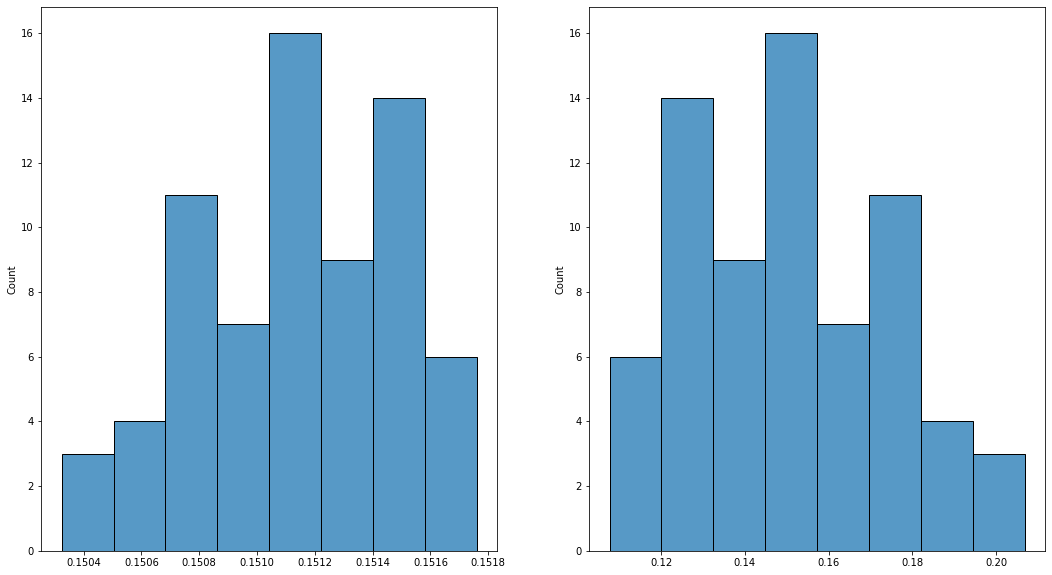

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.histplot(ax=axes[0], data=jk_m_d)
sns.histplot(ax=axes[1], data=jk_m_vals)

<AxesSubplot:ylabel='Count'>

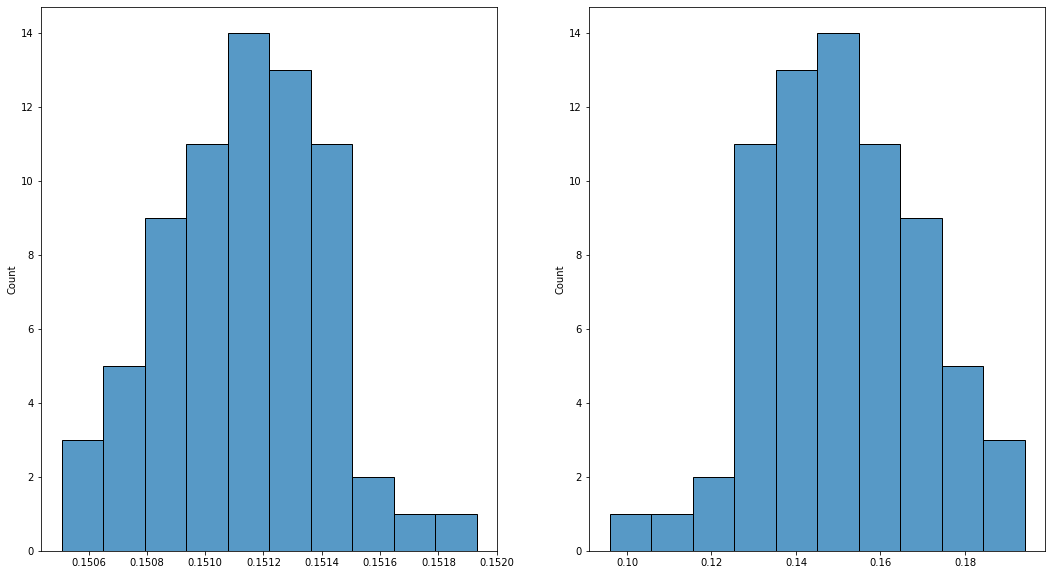

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.histplot(ax=axes[0], data=jk_mj_d)
sns.histplot(ax=axes[1], data=jk_mj_vals)

In [11]:
bt_normal = ci.normal(bt, 0.95, obs_value=obs_ts_diversity)
bt_quantile = ci.quantile(bt, 0.95)
bt_bias_corrected = ci.bias_corrected_normal(bt, 0.95, obs_ts_diversity)

jk_vals_ci = ci.jk_pseudo(jk_vals, 0.95)
jk_d_ci = ci.jk_m(jk_d, 0.5, obs_ts_diversity)

jk_m_vals_ci = ci.jk_pseudo(jk_m_vals, 0.95)
jk_m_d_ci = ci.jk_m(jk_m_d, 0.5, obs_ts_diversity)

jk_mj_vals_ci = ci.jk_pseudo(jk_mj_vals, 0.95)
jk_mj_d_ci = ci.jk_mj(jk_mj_d, 0.5, obs_ts_diversity, sizes, obs_ts.num_sites)

In [12]:
bt_normal

(0.14657747916565786, 0.1556841773999987)

In [13]:
bt_quantile

(0.14667793939393942, 0.15557485050505052)

In [14]:
bt_bias_corrected

(0.14638787851919322, 0.15549457675353406)

In [15]:
jk_vals_ci

(0.1464043809640541, 0.15585727560158516)

In [16]:
jk_d_ci

(0.14950429825651393, 0.15275735830914264)

In [17]:
jk_m_vals_ci

(0.1454499370075129, 0.15681246000247961)

In [18]:
jk_m_d_ci

(0.14917571447540012, 0.15308594209025644)

In [19]:
jk_mj_vals_ci

(0.14642077203525444, 0.1550665952449221)

In [20]:
jk_mj_d_ci

(-0.9096547134757369, 1.2119163700413935)

In [21]:
obs_ts_diversity

0.15113082828282828

In [22]:
sizes

array([  57,   62,   14,   55,   61,   16,   28,   35,   52,   26,   41,
         55,   25,   30,   55,   32,   20,   16,   53,   19,   10,   11,
         67,   42,   35,   36,   12,   26,   67,   39,   36,   34,   60,
         10,   33,   38,   55,   57,   34,   21,   12,   15,   46,   41,
         27,   27,   28,   16,   16,   19,   17,   66,   41,   24,   35,
         55,   12,   62,   65,   13,   15,   52,   28,   48,   34,   51,
         59,   13,   62, 2526])